<a href="https://colab.research.google.com/github/Ha-eunYu/Section_Project/blob/main/Section2/S2_PC2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import openpyxl
import seaborn as sns
import plotly.express as px
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix, recall_score, precision_score, classification_report
from sklearn.metrics import average_precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
data_path = './drive/MyDrive/Landslide_P/'

In [6]:
df=pd.read_csv('./drive/MyDrive/Landslide_P/Complete-data.csv')

In [7]:
df.columns

Index(['Landslide', 'Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow',
       'Lithology', 'NDVI', 'NDWI', 'Plan', 'Precipitation', 'Profile',
       'Slope'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1212 entries, 0 to 1211
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Landslide      1212 non-null   int64
 1   Aspect         1212 non-null   int64
 2   Curvature      1212 non-null   int64
 3   Earthquake     1212 non-null   int64
 4   Elevation      1212 non-null   int64
 5   Flow           1212 non-null   int64
 6   Lithology      1212 non-null   int64
 7   NDVI           1212 non-null   int64
 8   NDWI           1212 non-null   int64
 9   Plan           1212 non-null   int64
 10  Precipitation  1212 non-null   int64
 11  Profile        1212 non-null   int64
 12  Slope          1212 non-null   int64
dtypes: int64(13)
memory usage: 123.2 KB


In [9]:
df.corr().sort_values(by="Landslide", ascending=0)['Landslide']

Landslide        1.000000
Precipitation    0.280490
Earthquake       0.187313
Profile          0.169928
Slope            0.123029
NDVI             0.111900
Aspect          -0.008633
Plan            -0.103052
Lithology       -0.120538
Elevation       -0.168049
Curvature       -0.173393
NDWI            -0.194317
Flow            -0.261124
Name: Landslide, dtype: float64

In [10]:
def correlation(df, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [11]:
correlation(df, 0.8)
# slope, aspect, elevation, curvature plan, proﬁle curvature, plummet, road density, fault density, earthquake danger,lithology, soil,
# LCCS (land cover classiﬁcation system), NDVI (normalised difference vegetation index, 식생지수), TWI (topographic wetness index ), 
# SPI (stream power index) and STI (deposition sediment transport index), selected for landslide sensitivity assessment. 
# slope: 경사의 안정성에 영향을 주어 물의 발산과 수렴을 정의
# aspect: 지상 경사의 방향 또는 방향
# elevation: 경사면의 응력 확산을 결정 stress spread
# curvature plan 평면곡률 곡률 평면도; 최대 경사방향 수직
# proﬁle curvature 종단 곡률,프로파일의 곡률: 수직 평면의 경사와 평행한 곡률 유형
# NDVI 값이 높을수록 더 건강한 식물, NDVI 값이 0이면 녹색 초목이 없고 +1 (0.8-0.9)에 가까워지면 가능한 가장 높은 녹색 잎 밀도
# # 음수 값은 주로 구름, 물, 눈으로 나타나며 0에 가까운 값은 주로 바위와 흙;주로 0.2~0.3은 관목과 초원 등을 나타내며 0.6~0.8 온화한 열대 숲
# NDWI 식생 캐노피의 수분량을 연구하는데 유용한 지수인 Normalized Difference Water Index
# TWI: 지형습윤지수 DEM에서 파생, 지반학적 습윤을 나타내는 중요한 요소
# STI: 침식의 진행을 정성적으로 설명
# SPI: stream power(해류력)의 정도를 표현하기 위해 를 사용
# Precipitation: 사면의 전단 강도를 크게 방해하는 또 다른 중요한 요소는 특정 지역의 연간 평균 강우량
# Lithology: 지질 공학 요소를 설명합니다(Ciurleo et al. 2017). 경사면의 강도는 토양 유형에 따라 다르게 영향
# Curvature: 곡률

{'NDWI', 'Plan', 'Precipitation', 'Profile'}

In [26]:
df.drop_duplicates(keep='first', inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1198 entries, 0 to 1211
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Landslide      1198 non-null   int64
 1   Aspect         1198 non-null   int64
 2   Curvature      1198 non-null   int64
 3   Earthquake     1198 non-null   int64
 4   Elevation      1198 non-null   int64
 5   Flow           1198 non-null   int64
 6   Lithology      1198 non-null   int64
 7   NDVI           1198 non-null   int64
 8   NDWI           1198 non-null   int64
 9   Plan           1198 non-null   int64
 10  Precipitation  1198 non-null   int64
 11  Profile        1198 non-null   int64
 12  Slope          1198 non-null   int64
dtypes: int64(13)
memory usage: 131.0 KB


In [189]:
# df['Landslide'].value_counts()
# df['Aspect'].value_counts() #3 2 4 1 5
# df['Curvature'].value_counts() #3 4 2 1 5
# df['Earthquake'].value_counts() #2 3 1
# df['Elevation'].value_counts() #1 2 3 4 5
# df['Flow'].value_counts() #2 1 3 4 5
df['Lithology'].value_counts() #1slate 3 4 2Sandstone 6Unconsolidated 5Lim
# df['NDVI'].value_counts() #4:0.6-0.9; 3:0.3-0.6; 2:0-0.3; 1:<0 5 >0.9
# df['NDWI'].value_counts() #2 3 1 4 5
# df['Precipitation'].value_counts() #5 4 3 2 1
# df['Profile'].value_counts() #3 4 2 5 1
# df['Plan'].value_counts() # 3 4 2 5 1
# df['Slope'].value_counts() #3 2 4 1 5

1    747
3    184
4    107
2     79
6     51
5     30
Name: Lithology, dtype: int64

In [14]:
# g = sns.factorplot(x = 'NDVI', y = 'NDWI', data = df, kind = 'bar', size = 6);
# g.set_ylabels('Landslide Prediction Probability');
# df_pivot = pd.pivot_table(df, values="Slope",index="Flow",columns="Landslide", aggfunc=np.mean)
# df_pivot
# #Creating a grouped bar chart
# ax = df_pivot.plot(kind="bar",alpha=0.5)
# plt.title('Slope')
# plt.xlabel('Flow')
# g = sns.FacetGrid(df, col = 'Landslide')
# g.map(sns.distplot, 'Slope', bins = 10)
# g = sns.FacetGrid(df, col = 'Landslide')
# g.map(sns.distplot, 'Flow', bins = 10)

In [15]:
# numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
# numerical_vars = list(df.select_dtypes(include=numerics).columns)
# data = df[numerical_vars]
# data.shape

(1212, 13)

In [308]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['Landslide'], axis=1),
    df['Landslide'],
    test_size=0.3,
    random_state=1)

In [309]:
target='Landslide'
train=pd.merge(y_train,X_train,left_index=True, right_index=True)
# 80/20 비율로 학습/테스트 데이터를 분리합니다.
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train[target], random_state=2)
X_val = val.drop(columns=target)
y_val = val[target]
X_train = train.drop(columns=target)
y_train = train[target]

In [310]:
y_train.value_counts(normalize=True)

0    0.5
1    0.5
Name: Landslide, dtype: float64

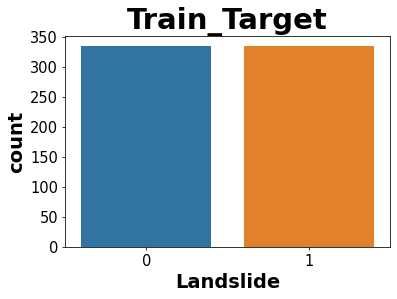

In [311]:
sns.countplot(y_train)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Train_Target',weight='bold',fontsize=30);
plt.xlabel('Landslide',weight='bold',fontsize=20);
plt.ylabel('count',weight='bold',fontsize=20);

In [312]:
df.groupby('Curvature')['Flow'].agg(['min','max','mean','median'])

,min,max,mean,median
Curvature,,,,
1,1,5,2.379310,2.0
2,1,5,2.306050,2.0
3,1,5,2.319613,2.0
4,1,5,2.346290,2.0
5,1,5,2.504762,2.0


In [313]:
# !pip install category_encoders
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [314]:
from sklearn.pipeline import Pipeline
# encoder, imputer를 preprocessing으로 묶었습니다. 후에 eli5 permutation 계산에 사용합니다
pipe = Pipeline([
    ('preprocessing', make_pipeline(SimpleImputer())),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)) 
])

In [315]:
pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

검증 정확도:  0.8095238095238095


In [316]:
# !pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

In [317]:
# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['rf'], # model
    scoring='accuracy', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

In [318]:
# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_val_transformed, y_val);

In [319]:
feature_names = X_val.columns.tolist()
pd.Series(permuter.feature_importances_, feature_names).sort_values()

NDWI            -0.007143
Plan             0.002381
Curvature        0.003571
NDVI             0.009524
Earthquake       0.011905
Precipitation    0.013095
Lithology        0.014286
Aspect           0.034524
Profile          0.047619
Flow             0.060714
Elevation        0.069048
Slope            0.072619
dtype: float64

In [320]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

Weight,Feature
0.0726 ± 0.0332,Slope
0.0690 ± 0.0430,Elevation
0.0607 ± 0.0394,Flow
0.0476 ± 0.0271,Profile
0.0345 ± 0.0394,Aspect
0.0143 ± 0.0221,Lithology
0.0131 ± 0.0205,Precipitation
0.0119 ± 0.0151,Earthquake
0.0095 ± 0.0256,NDVI
0.0036 ± 0.0143,Curvature


In [321]:
# 중요도를 이용하여 특성을 선택(Feature selection)
minimum_importance = 0.001
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train_selected = X_train[features]
X_val_selected = X_val[features]
X_test_selected= X_test[features]
print('특성 삭제 후:', X_train_selected.shape, X_val_selected.shape)

특성 삭제 후: (670, 11) (168, 11)


In [322]:
# pipeline 다시 정의
pipe = Pipeline([
    ('preprocessing', make_pipeline( SimpleImputer())),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)) 
], verbose=1)

pipe.fit(X_train_selected, y_train);

[Pipeline] ..... (step 1 of 2) Processing preprocessing, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing rf, total=   0.5s


In [323]:
print('검증 정확도: ', pipe.score(X_val_selected, y_val))

검증 정확도:  0.8035714285714286


In [324]:
from xgboost import XGBClassifier

pipe = make_pipeline(
    # OrdinalEncoder(),
    SimpleImputer(strategy='median'),
    XGBClassifier(n_estimators=200
                  , random_state=2
                  , n_jobs=-1
                  , max_depth=7
                  , learning_rate=0.2
                 )
)

pipe.fit(X_train_selected, y_train);

In [325]:
from sklearn.metrics import accuracy_score
y_pred = pipe.predict(X_val_selected)
print('검증 정확도: ', accuracy_score(y_val, y_pred))

print(classification_report(y_pred, y_val))

검증 정확도:  0.8035714285714286
              precision    recall  f1-score   support

           0       0.77      0.82      0.80        79
           1       0.83      0.79      0.81        89

    accuracy                           0.80       168
   macro avg       0.80      0.80      0.80       168
weighted avg       0.81      0.80      0.80       168



In [326]:
# encoder = OrdinalEncoder()
# X_train_encoded = encoder.fit_transform(X_train) # 학습데이터
# X_val_encoded = encoder.transform(X_val) # 검증데이터

model = XGBClassifier(
    n_estimators=1000,  # <= 1000 트리로 설정했지만, early stopping 에 따라 조절됩니다.
    max_depth=7,        # default=3, high cardinality 특성을 위해 기본보다 높여 보았습니다.
    learning_rate=0.2,
#     scale_pos_weight=ratio, # imbalance 데이터 일 경우 비율을 적용합니다.
    n_jobs=-1
)

eval_set = [(X_train_selected, y_train), 
            (X_val_selected, y_val)]

model.fit(X_train_selected, y_train, 
          eval_set=eval_set,
          eval_metric='error', # #(wrong cases)/#(all cases)
          early_stopping_rounds=50
         ) # 50 rounds 동안 스코어의 개선이 없으면 멈춤

[0]	validation_0-error:0.179104	validation_1-error:0.261905
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 50 rounds.
[1]	validation_0-error:0.165672	validation_1-error:0.27381
[2]	validation_0-error:0.150746	validation_1-error:0.255952
[3]	validation_0-error:0.155224	validation_1-error:0.232143
[4]	validation_0-error:0.147761	validation_1-error:0.244048
[5]	validation_0-error:0.146269	validation_1-error:0.244048
[6]	validation_0-error:0.146269	validation_1-error:0.232143
[7]	validation_0-error:0.138806	validation_1-error:0.232143
[8]	validation_0-error:0.131343	validation_1-error:0.22619
[9]	validation_0-error:0.122388	validation_1-error:0.208333
[10]	validation_0-error:0.123881	validation_1-error:0.202381
[11]	validation_0-error:0.11791	validation_1-error:0.196429
[12]	validation_0-error:0.119403	validation_1-error:0.196429
[13]	validation_0-error:0.108955	validation_1-error:0.20238

XGBClassifier(learning_rate=0.2, max_depth=7, n_estimators=1000, n_jobs=-1)

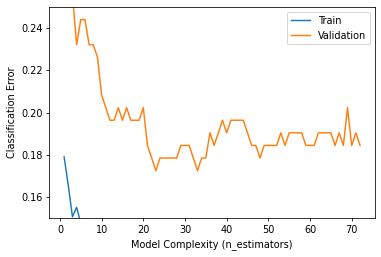

In [327]:
results = model.evals_result()
train_error = results['validation_0']['error']
val_error = results['validation_1']['error']

epoch = range(1, len(train_error)+1)
plt.plot(epoch, train_error, label='Train')
plt.plot(epoch, val_error, label='Validation')
plt.ylabel('Classification Error')
plt.xlabel('Model Complexity (n_estimators)')
plt.ylim((0.15, 0.25)) # Zoom in
plt.legend();

In [330]:
print('검증 정확도', model.score(X_val_selected, y_val))

print(classification_report(y_val, model.predict(X_val_selected)))

검증 정확도 0.8273809523809523
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        84
           1       0.80      0.88      0.84        84

    accuracy                           0.83       168
   macro avg       0.83      0.83      0.83       168
weighted avg       0.83      0.83      0.83       168



In [331]:
from sklearn.metrics import roc_auc_score

y_pred_proba = pipe.predict_proba(X_val_selected)[:, -1]
print('AUC score: ', roc_auc_score(y_val, y_pred_proba))

AUC score:  0.8769132653061225


AUC score:  0.8769132653061225


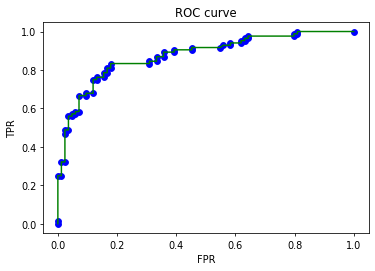

In [333]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

print('AUC score: ', roc_auc_score(y_val, y_pred_proba))
plt.scatter(fpr, tpr, color='blue')
plt.plot(fpr, tpr, color='green')
plt.title('ROC curve');
plt.xlabel('FPR');
plt.ylabel('TPR');

In [334]:
# dpi(dots per inch) 수치를 조정해 이미지 화질을 조정 할 수 있습니다
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 70

In [335]:
# !pip install pdpbox  
from pdpbox.pdp import pdp_isolate, pdp_plot

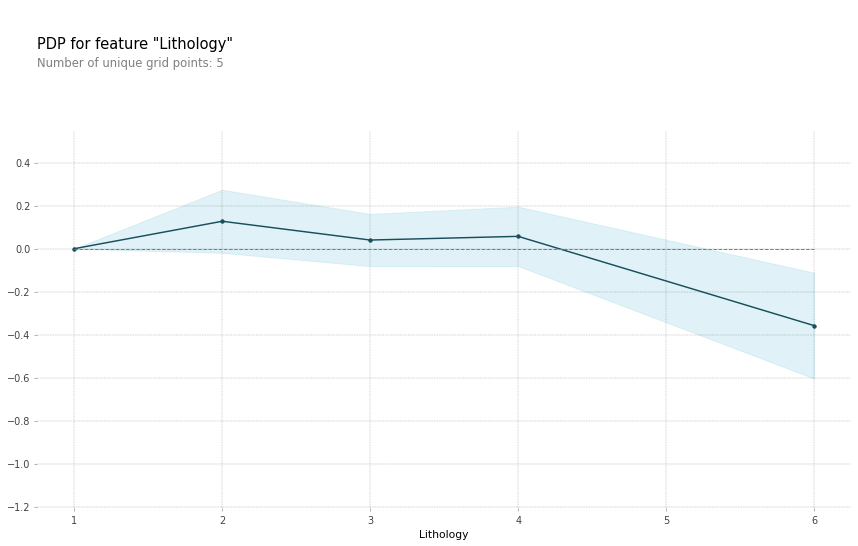

In [336]:
feature = 'Lithology'

isolated = pdp_isolate(
    model=model, 
    dataset=X_val_selected, 
    model_features=X_val_selected.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature);

In [ ]:
pdp_plot(isolated
         , feature_name=feature
         , plot_lines=True # ICE plots
         , frac_to_plot=0.001 # or 10 (# 10000 val set * 0.001)
         , plot_pts_dist=True) 

plt.xlim(20000,150000);
plt.xticks([1, 2,3,4,5,6], ['male', 'female',]);

In [1]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot
# 2D PDP
features = ['Flow', 'Slope']

interaction = pdp_interact(
    model=model, 
    dataset=X_val_selected, 
    model_features=X_val_selected.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);

ModuleNotFoundError: ignored

In [339]:
X_val_selected.columns

Index(['Aspect', 'Curvature', 'Earthquake', 'Elevation', 'Flow', 'Lithology',
       'NDVI', 'Plan', 'Precipitation', 'Profile', 'Slope'],
      dtype='object')

In [187]:
X_val_selected['Lithology'].value_counts()
# 1 Sandstone 
# 2 Slate
# 3 Quarizite
# 4 Granite
# 5 Limestone
# 6 Unconsolidated

1    102
3     27
4     20
2     12
6      6
5      1
Name: Lithology, dtype: int64

In [226]:
df['Lithology'].value_counts()

1    747
3    184
4    107
2     79
6     51
5     30
Name: Lithology, dtype: int64

In [216]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 7.2 MB/s 


In [349]:
row = X_test_selected.iloc[[300]]
## UnicodeDecoderError 발생시 xgboost 1.1-> 1.0 다운그레이드 (conda install -c conda-forge xgboost=1.0)
import xgboost
import shap

explainer = shap.TreeExplainer(model)
# row_processed = processor.transform(row) #processor = make_pipeline(OrdinalEncoder(), SimpleImputer(strategy='median'))
shap_values = explainer.shap_values(row) #_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # SHAP value를 확률로 변환해 표시합니다.
)

In [351]:
# dpi(dots per inch) 수치를 조정해 이미지 화질을 조정 할 수 있습니다
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144

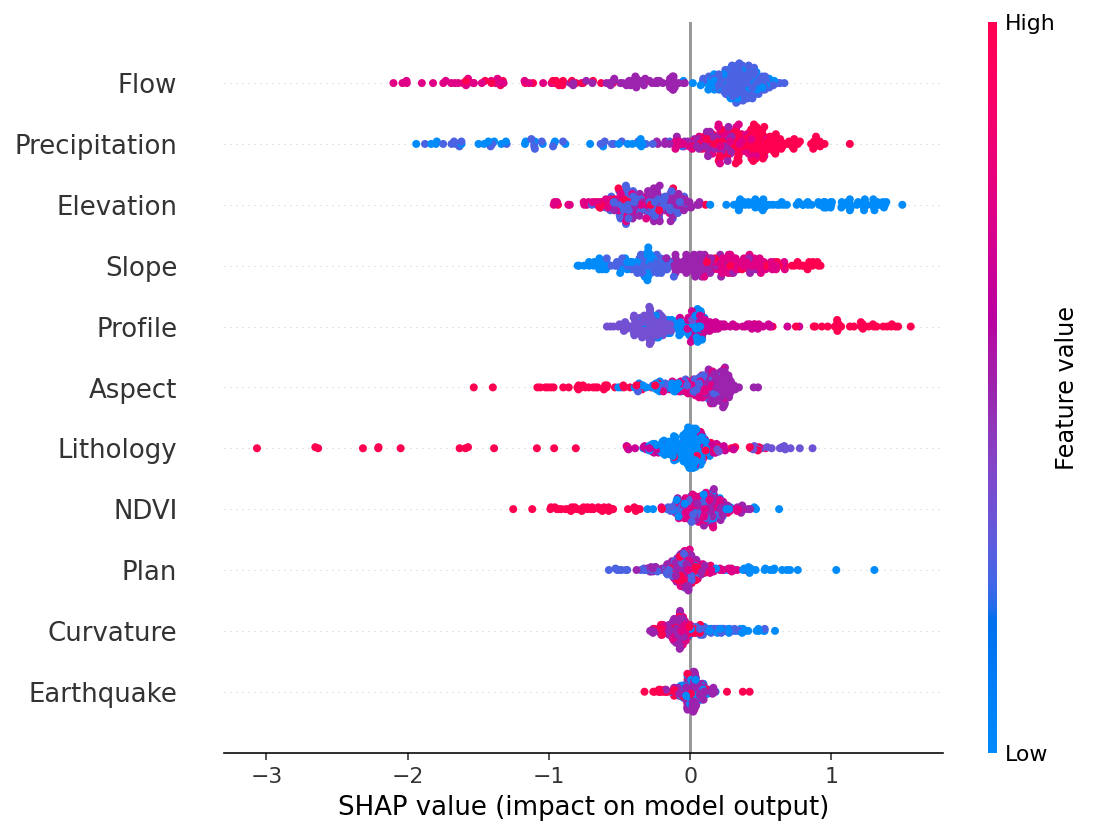

In [353]:
shap_values = explainer.shap_values(X_test_selected.iloc[:300])
shap.summary_plot(shap_values, X_test_selected.iloc[:300])

In [214]:
X_test_selected.shape

(360, 10)